In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("train.csv")

In [41]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# Clean up null values
gender_cat = pd.get_dummies(data.Gender, prefix = 'gender').gender_Female
married_category = pd.get_dummies(data.Married, prefix = 'marriage').marriage_Yes
graduate_category= pd.get_dummies(data.Education, prefix = 'education').education_Graduate
self_emp_category = pd.get_dummies(data.Self_Employed, prefix = 'employed').employed_Yes
loan_status = pd.get_dummies(data.Loan_Status,prefix='status').status_Y
property_category = pd.get_dummies(data.Property_Area,prefix='property')

data.Credit_History.fillna(data.Credit_History.max(), inplace = True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace = True)
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace = True)

data.Dependents.fillna(0,inplace=True)
data.Gender.fillna(0, inplace = True)
data.Married.fillna(0, inplace = True)
data.Self_Employed.fillna(0, inplace = True)

In [45]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
data_new = pd.concat([data,gender_cat,married_category,graduate_category,self_emp_category,loan_status,property_category],axis=1)

In [47]:
data_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,gender_Female,marriage_Yes,education_Graduate,employed_Yes,status_Y,property_Rural,property_Semiurban,property_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,Urban,Y,0,0,1,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,Rural,N,0,1,1,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,Urban,Y,0,1,1,1,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,Urban,Y,0,1,0,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,Urban,Y,0,0,1,0,1,0,0,1


In [48]:
data_new.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'gender_Female', 'marriage_Yes', 'education_Graduate', 'employed_Yes',
       'status_Y', 'property_Rural', 'property_Semiurban', 'property_Urban'],
      dtype='object')

In [49]:
feature_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','gender_Female','marriage_Yes','education_Graduate','employed_Yes','property_Rural','property_Semiurban','property_Urban']

In [50]:
X = data_new[feature_columns]

In [51]:
y = data_new['status_Y']
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: status_Y, Length: 614, dtype: uint8

In [52]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=42)

In [53]:
X_train.shape

(607, 12)

In [54]:
X_test.shape

(7, 12)

In [55]:
randForest = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
randForest.fit(X_train,y_train)
y_pred_class  = randForest.predict(X_test)
randForestScore = accuracy_score(y_test,y_pred_class)
%time print ("Random forest accuraccy score",randForestScore)

Random forest accuraccy score 1.0
CPU times: user 130 µs, sys: 82 µs, total: 212 µs
Wall time: 176 µs


In [56]:
randForestNew = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
randForestNew.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
# Import test data and test the model

In [58]:
testData = pd.read_csv("test.csv")

In [59]:
testData.shape

(367, 12)

In [60]:
testData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [61]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [62]:

gender_cat = pd.get_dummies(testData.Gender,prefix='gender').gender_Female
married_category = pd.get_dummies(testData.Married,prefix='marriage').marriage_Yes
graduate_category = pd.get_dummies(testData.Education,prefix='education').education_Graduate
self_emp_category = pd.get_dummies(testData.Self_Employed,prefix='employed').employed_Yes
property_category = pd.get_dummies(testData.Property_Area,prefix='property')
testData.Gender.fillna(0,inplace =True)
testData.Married.fillna(0,inplace=True)
testData.Credit_History.fillna(testData.Credit_History.max(),inplace=True)
testData.LoanAmount.fillna(testData.LoanAmount.mean(),inplace=True)
testData.Loan_Amount_Term.fillna(testData.Loan_Amount_Term.mean(),inplace=True)
testData.Self_Employed.fillna(0,inplace=True)
testData.Dependents.fillna(0,inplace=True)


In [63]:
testData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [64]:
testData_new = pd.concat([testData,gender_cat,married_category,graduate_category,self_emp_category,property_category],axis=1)

In [65]:
X_testData = testData_new[feature_columns]

In [66]:
X_testData.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Female,marriage_Yes,education_Graduate,employed_Yes,property_Rural,property_Semiurban,property_Urban
0,5720,0,110.0,360.0,1.0,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,0,0,0,0,1


In [67]:
y_test_pread_class = randForestNew.predict(X_testData)

In [68]:
randForestFormat = ["Y" if i == 1 else "N" for i in y_test_pread_class ]

In [69]:
pd.DataFrame({'Loan_ID':testData.Loan_ID,'Loan_Status':randForestFormat}).to_csv('radom_forest_submission.csv',index=False)

In [70]:
#Visualization

In [71]:
pd.crosstab(data["Credit_History"], data["Loan_Status"], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [72]:
def percent(x):
    return x/float(x[-1])
pd.crosstab(data["Credit_History"], data["Loan_Status"], margins = True).apply(percent, axis = 1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


In [73]:
prop_rates = pd.DataFrame([1000,5000,12000], index = ['Rural','Semiurban','Urban'], columns =["Rates"])
prop_rates

,Rates
Rural,1000
Semiurban,5000
Urban,12000


In [74]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','Rates'], aggfunc=len)

,,Credit_History
Property_Area,Rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [75]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


/Users/Shared/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


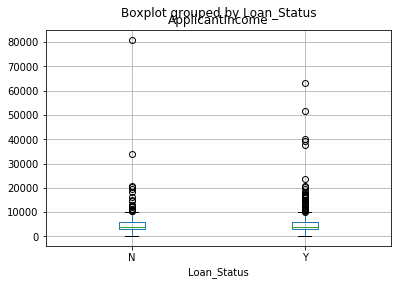

In [76]:
%matplotlib inline
data.boxplot(column = "ApplicantIncome", by = "Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112eccbe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113455320>], dtype=object)

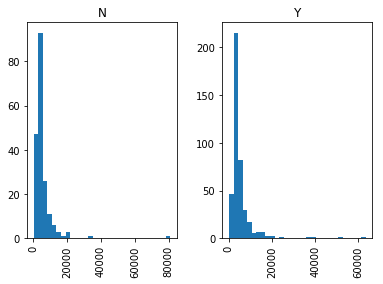

In [77]:
data.hist(column = "ApplicantIncome", by = "Loan_Status",bins= 30)

In [78]:
#Some additional practice
# def binning(col, cut_points, labels = None):
#     minval = col.min()
#     maxval = col.max()
#     break_points = [minval] +cut_points +[maxval]
    
#     if not labels:
#         labels = range(len(cut_points)+1)
    
#     colBin = pd.cut(col,bins=break_points,labels= labels,include_lowest=True)
#     return colBin

# cut_points = [90, 140, 190]
# labels = ["low","medium","high","very high"]
# data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
# print (pd.value_counts(data["LoanAmount_Bin"], sort=False))

In [ ]:
#Source
#https://github.com/souravroy0708/ML_LoanPrediction/blob/master/LoanPrediction.ipynb